# Task 1A: Build a Fully Connected 2 - Layer Neural Network to Classify Digits

This notebook will serve as implementation of the API that you have created in your "Code" folder. You will write functions in the "py" files and use them here.

We will be using inbuilt MNIST dataset present in PyTorch and train a neural network to classify digits. 

## What is expected from this notebook?

This notebook should be used to present your work. You should explain wherever necessary (but also not too much) about what you did and why you did it. You should explain things like hyper parameter settings (even if it was provided before hand to you by us), training performance and testing performance of the model. You should reason why your model is working fine and not overfitting.

Since numbers don't are an argot, you should also use visualizations wherever possible. You can visualize things like loss curve, show confusion matrix, etc. 

Finally, you can show some manual verifications by displaying and making predictions on random test examples. 

**NOTE: The amount of things you can do in this notebook is limitless (hyperbole). But don't do too much at the cost of rest of your tasks. Remember to maintain the outputs while submitting this notebook.**

## Absolutely required items?

1. First of all, import the libraries and the dataset.
2. Next, show dataset samples and distribution of different type of data. For example, in case of MNIST you can show some random images and their labels. Also, show distribution of each class of images.
3. Next, perform required transformations on MNIST dataset (normalization, scaling, grayscaling if required, etc) using torchvision transforms.
4. Create required dataloaders on PyTorch MNIST dataset to load data in mini-batches.
5. Train the model, show loss and accuracy at each step of operation.
6. Plot the **loss curve for both train and validation phase**
7. Pick some manual random images from test dataset and predict their values **showing expected and actual result**.

**NOTE: You may or may not delete these instruction cells after completion of the notebook.**

# Your solution

In [332]:
#LIBRARIES TO IMPORT

import torch
import torchvision
import random
import numpy as np
from random import randint
from math import e
from matplotlib import pyplot as plt

In [333]:
#Main File




# We will use torchvision's transforms and datasets




# TODO: Defining torchvision transforms for preprocessing
# TODO: Using torchvision datasets to load MNIST

train_data=torchvision.datasets.MNIST('./data', train=True, download=False,
                                           transform=torchvision.transforms.Compose([
                                           torchvision.transforms.ToTensor(),
                                           torchvision.transforms.Normalize((0.1307,), (0.3081,))]))



train_loader = torch.utils.data.DataLoader(train_data,batch_size=16, shuffle=True)


test_data=torchvision.datasets.MNIST('./data', train=False, download=False,
                                           transform=torchvision.transforms.Compose([
                                           torchvision.transforms.ToTensor(),
                                           torchvision.transforms.Normalize((0.1307,), (0.3081,))]))



test_loader = torch.utils.data.DataLoader(test_data,batch_size=10000, shuffle=True)



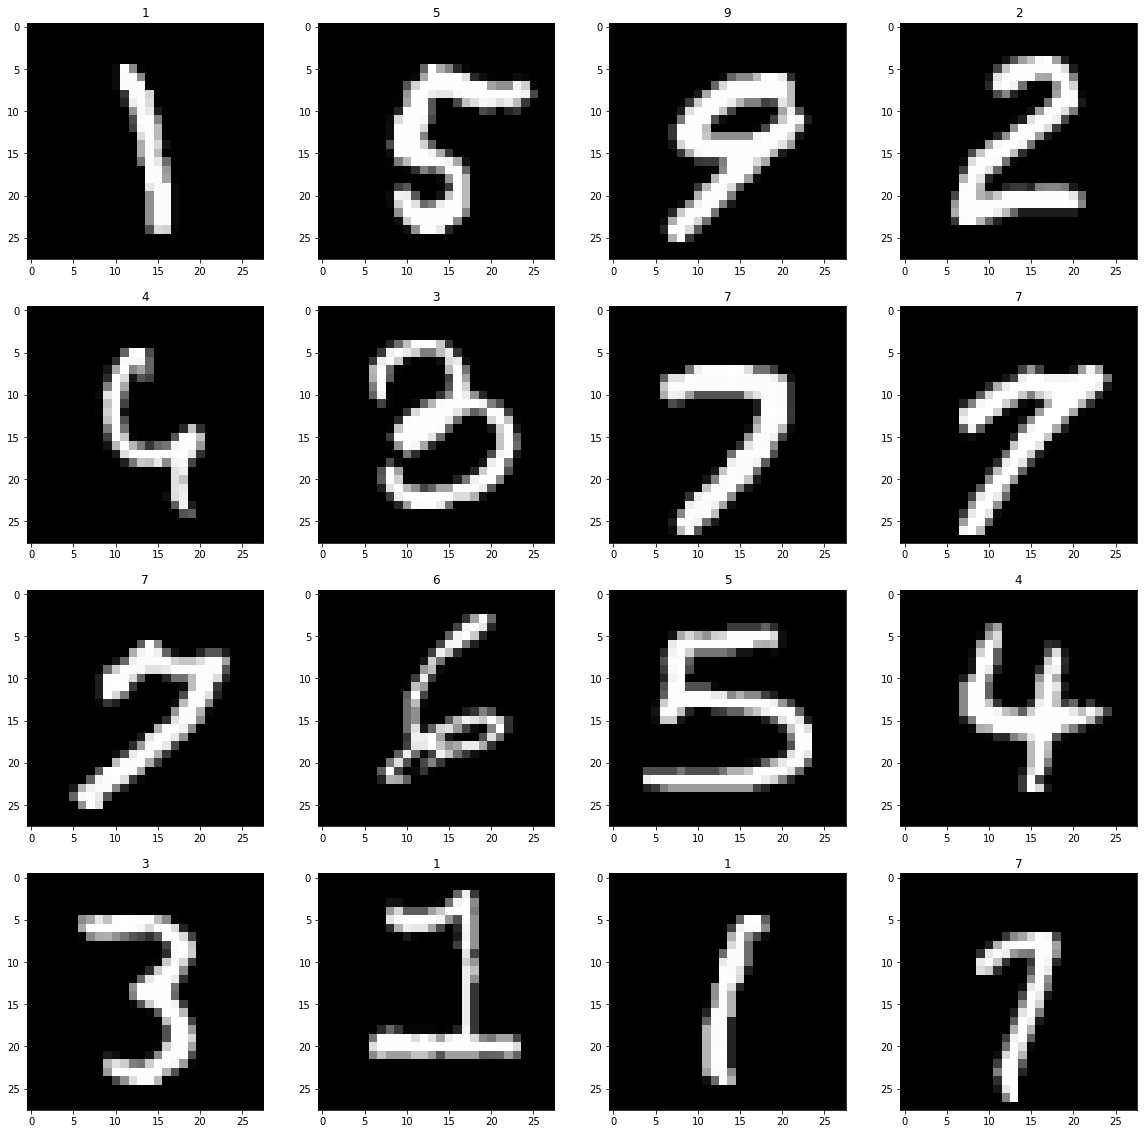

In [334]:
# PLotting from Dataset
fig=plt.figure(figsize=(20, 20))
train_loader=list(train_loader)
for i in range(len(train_loader[0][0])):
    fig.add_subplot(4,4,i+1)
    plt.imshow(train_loader[0][0][i].reshape(28,28),cmap='gray')
    plt.title(train_loader[0][1][i].item())


In [335]:
# Distribution of labels
dist=torch.utils.data.DataLoader(train_data,batch_size=60000, shuffle=True)
dist=list(dist)
dist=dist[0][1]
dist=list(dist)
dist=[x.item() for x in dist]
dist={x:dist.count(x) for x in range(10)}
dist

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [336]:
#Global Variable for loss curve
epoch_graph=[]
loss_graph=[]

In [337]:

# NOTE: You can only use Tensor API of PyTorch



def gen(x,y=1):
    a=[]
    for i in range(x*y):
        a.append(random.uniform(-1/(y**.5),1/(y**.5)))

    a=torch.tensor(a).view(x,y)
    return a.float()

def gen_b(x):
    a=[]
    for i in range(x):
        a.append((random.uniform(-1/(x**.5),1/(x**.5))))

    return torch.tensor(a).float()
class FullyConnected:
    """Constructs the Neural Network architecture.

    Args:
        N_in (int): input size
        N_h1 (int): hidden layer 1 size
        N_h2 (int): hidden layer 2 size
        N_out (int): output size
        device (str, optional): selects device to execute code. Defaults to 'cpu'

    Examples:
        >>> network = model.FullyConnected(2000, 512, 256, 5, device='cpu')
        >>> creloss, accuracy, outputs = network.train(inputs, labels)
    """

    def __init__(self, N_in, N_h1, N_h2, N_out, device='cpu'):
        """Initializes weights and biases, and construct neural network architecture.

        One [recommended](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf) approach is to initialize weights randomly but uniformly in the interval from [-1/n^0.5, 1/n^0.5] where 'n' is number of neurons from incoming layer. For example, number of neurons in incoming layer is 784, then weights should be initialized randomly in uniform interval between [-1/784^0.5, 1/784^0.5].

        You should maintain a list of weights and biases which will be initalized here. They should be torch tensors.

        Optionally, you can maintain a list of activations and weighted sum of neurons in a dictionary named Cache to avoid recalculation of those. If tensors are too large it could be an issue.
        """
        self.N_in = N_in
        self.N_h1 = N_h1
        self.N_h2 = N_h2
        self.N_out = N_out

        self.device = torch.device(device)

        w1 =gen(N_h1,N_in)
        w2 =gen(N_h2,N_h1)
        w3 =gen(N_out,N_h2)
        self.weights = {'w1': w1, 'w2': w2, 'w3': w3}


        b1 = gen_b(N_h1)
        b2 = gen_b(N_h2)
        b3 = gen_b(N_out)
        self.biases = {'b1': b1, 'b2': b2, 'b3': b3}

        z1=  torch.zeros(256).float()
        z2=  torch.zeros(256).float()
        z3=  torch.zeros(10).float()

        self.cache = {'z1': z1, 'z2': z2, 'z3': z3}


    # TODO: Change datatypes to proper PyTorch datatypes

    def train(self, inputs, labels,lr=0.01, debug=True):
        """Trains the neural network on given inputs and labels.

        This function will train the neural network on given inputs and minimize the loss by backpropagating and adjusting weights with some optimizer.

        Args:
            inputs (torch.tensor): inputs to train neural network. Size (batch_size, N_in)
            labels (torch.tensor): correct labels. Size (batch_size)
            lr (float, optional): learning rate for training. Defaults to 0.001
            debug (bool, optional): prints loss and accuracy on each update. Defaults to False

        Returns:
            creloss (float): average cross entropy loss
            accuracy (float): ratio of correctly classified to total samples
            outputs (torch.tensor): predictions from neural network. Size (batch_size, N_out)
        """


        outputs = self.forward(inputs)# forward pass

        creloss = cross_entropy_loss(outputs,labels)  # calculate loss
        accuracy = self.accuracy(outputs,labels)# calculate accuracy

        if debug:
            print('loss: ', creloss)
            print('accuracy: ', accuracy)


        dw1, db1, dw2, db2, dw3, db3 = self.backward(inputs,labels,outputs)
        self.weights, self.biases = mbgd(self.weights, self.biases, dw1, db1, dw2, db2, dw3, db3, lr)
        return creloss

    def predict(self, inputs):
        """Predicts output probability and index of most activating neuron

        This function is used to predict output given inputs. You can then use index in classes to show which class got activated. For example, if in case of MNIST fifth neuron has highest firing probability, then class[5] is the label of input.

        Args:
            inputs (torch.tensor): inputs to train neural network. Size (batch_size, N_in)

        Returns:
            score (torch.tensor): max score for each class. Size (batch_size)
            idx (torch.tensor): index of most activating neuron. Size (batch_size)
        """
        outputs = self.forward(inputs)# forward pass

        score, idx = torch.max(outputs,1)# find max score and its index
        return score, idx

    def eval(self, inputs, labels,debug=True):
        """Evaluate performance of neural network on inputs with labels.

        This function is used to evaluate loss and accuracy of neural network on new examples. Unlike predict(), this function will not only predict but also calculate and return loss and accuracy w.r.t given inputs and labels.

        Args:
            inputs (torch.tensor): inputs to train neural network. Size (batch_size, N_in)
            labels (torch.tensor): correct labels. Size (batch_size)
            debug (bool, optional): print loss and accuracy on every iteration. Defaults to False

        Returns:
            loss (float): average cross entropy loss
            accuracy (float): ratio of correctly to uncorrectly classified samples
            outputs (torch.tensor): predictions from neural network. Size (batch_size, N_out)
        """

        print("Train Data")
        outputs = self.forward(inputs)# forward pass



        creloss = cross_entropy_loss(outputs,labels) # calculate loss
        accuracy = self.accuracy(outputs,labels)# calculate accuracy

        if debug:
            print('loss: ', creloss)
            print('accuracy: ', accuracy)

        return creloss, accuracy, outputs

    def accuracy(self, outputs, labels):
        """Accuracy of neural network for given outputs and labels.

        Calculates ratio of number of correct outputs to total number of examples.

        Args:
            outputs (torch.tensor): outputs predicted by neural network. Size (batch_size, N_out)
            labels (torch.tensor): correct labels. Size (batch_size)

        Returns:
            accuracy (float): accuracy score
        """

        score, idx = torch.max(outputs,1)

        count=0
        for i,j in zip(labels,idx):
            if i==j:
                count+=1

        accuracy = count/len(labels)
        return accuracy

    def forward(self, inputs):
        """Forward pass of neural network

        Calculates score for each class.

        Args:
            inputs (torch.tensor): inputs to train neural network. Size (batch_size, N_in)

        Returns:
            outputs (torch.tensor): predictions from neural network. Size (batch_size, N_out)
        """
        self.cache['z1'] = self.weighted_sum(inputs.float(),self.weights['w1'],self.biases['b1']).float()
        a1 = sigmoid(self.cache['z1']).float()
        self.cache['z2'] = self.weighted_sum(a1,self.weights['w2'],self.biases['b2'])
        a2 = sigmoid(self.cache['z2']).float()
        self.cache['z3'] = self.weighted_sum(a2,self.weights['w3'],self.biases['b3'])
        outputs =  softmax(self.cache['z3']).float()



        return outputs

    def weighted_sum(self, X, w, b):
        """Weighted sum at neuron

        Args:
            X (torch.tensor): matrix of Size (K, L)
            w (torch.tensor): weight matrix of Size (J, L)
            b (torch.tensor): vector of Size (J)

        Returns:
            r1esult (torch.tensor): w*X + b of Size (K, J)
        """

        result = torch.mm(X,w.t()) + b
        return result

    def backward(self, inputs, labels, outputs):
        """Backward pass of neural network

        Changes weights and biases of each layer to reduce loss

        Args:
            inputs (torch.tensor): inputs to train neural network. Size (batch_size, N_in)
            labels (torch.tensor): correct labels. Size (batch_size)
            outputs (torch.tensor): outputs predicted by neural network. Size (batch_size, N_out)

        Returns:
            dw1 (torch.tensor): Gradient of loss w.r.t. w1. Size like w1
            db1 (torch.tensor): Gradient of loss w.r.t. b1. Size like b1
            dw2 (torch.tensor): Gradient of loss w.r.t. w2. Size like w2
            db2 (torch.tensor): Gradient of loss w.r.t. b2. Size like b2
            dw3 (torch.tensor): Gradient of loss w.r.t. w3. Size like w3
            db3 (torch.tensor): Gradient of loss w.r.t. b3. Size like b3
        """
        # Calculating derivative of loss w.r.t weighted sum




        dout = delta_cross_entropy_softmax(outputs, labels)
        d2 =   (torch.mm(dout,self.weights['w3'])).float()*delta_sigmoid(self.cache['z2'])
        d1 =   (torch.mm(d2,self.weights['w2'])).float()*delta_sigmoid(self.cache['z1'])




        dw1, db1, dw2, db2, dw3, db3 = self.calculate_grad(inputs,d1,d2,dout)# calculate all gradients


        return dw1, db1, dw2, db2, dw3, db3

    def calculate_grad(self, inputs, d1, d2, dout):
        """Calculates gradients for backpropagation

        This function is used to calculate gradients like loss w.r.t. weights and biases.

        Args:
            inputs (torch.tensor): inputs to train neural network. Size (batch_size, N_in)
            dout (torch.tensor): error at output. Size like aout or a3 (or z3)
            d2 (torch.tensor): error at hidden layer 2. Size like a2 (or z2)
            d1 (torch.tensor): error at hidden layer 1. Size like a1 (or z1)

        Returns:
            dw1 (torch.tensor): Gradient of loss w.r.t. w1. Size like w1
            db1 (torch.tensor): Gradient of loss w.r.t. b1. Size like b1
            dw2 (torch.tensor): Gradient of loss w.r.t. w2. Size like w2
            db2 (torch.tensor): Gradient of loss w.r.t. b2. Size like b2
            dw3 (torch.tensor): Gradient of loss w.r.t. w3. Size like w3
            db3 (torch.tensor): Gradient of loss w.r.t. b3. Size like b3
        """
#        print("In Calc Grad\n-------------------------------------------------------")
        dw3 = torch.mm(dout.t(),sigmoid(self.cache['z2']))
#        print(torch.sum(dw3),torch.sum(dout),torch.sum(activation.sigmoid(self.cache['z2'])),)
        dw2 = torch.mm(d2.t(),sigmoid(self.cache['z1']))
#        print(torch.sum(dw2),torch.sum(d2),torch.sum(activation.sigmoid(self.cache['z1'])))
        dw1 = torch.mm(d1.t(),inputs.float())
#        print(torch.sum(dw1),torch.sum(d1),torch.sum(inputs))
#        print("In Calc Grad\n-------------------------------------------------------")
        db1 = torch.sum(d1,0)
        db2 = torch.sum(d2,0)
        db3 = torch.sum(dout,0)



        return dw1, db1, dw2, db2, dw3, db3





In [338]:

#Activation File

# NOTE: You can only use Tensor API of PyTorch

import torch

# Extra TODO: Document with proper docstring
def sigmoid(z):
    """Calculates sigmoid values for tensors

    """
    result =  1/(1+torch.exp(-z))
    return result.float()

# Extra TODO: Document with proper docstring
def delta_sigmoid(z):
    """Calculates derivative of sigmoid function

    """
    grad_sigmoid = sigmoid(z).float()*(1-sigmoid(z)).float()
    '''
    print("---------------Grad Sigmoid--------------")
    print(z)
    print(grad_sigmoid)

    print("---------------Grad Sigmoid--------------")
    '''
    return grad_sigmoid

# Extra TODO: Document with proper docstring
def softmax(x):
    """Calculates stable softmax (minor difference from normal softmax) values for tensors

    """
    b=torch.max(x,1)
    b,c=b
    for i in range(len(x)):
        x[i]-=b[i]
    s=torch.sum(torch.exp(x),1)
    for i in range(len(x)):
        x[i]= torch.exp(x[i])/s[i]
    stable_softmax=x
    return stable_softmax




In [339]:
#Loss File


# NOTE: You can only use Tensor API of PyTorch


# Extra TODO: Document with proper docstring
def cross_entropy_loss(outputs, labels):
    """Calculates cross entropy loss given outputs and actual labels




    print("These are labels\n\n")
    print(labels,'\n\n',outputs)
    """
    l=torch.zeros(outputs.shape).float()
    l[range(len(labels)),labels]=1
    labels=l
    s=e**-15
    outputs.clamp(s,1-s)


    creloss= -torch.sum(labels*torch.log(outputs))/labels.shape[0]


    return creloss.item()   # should return float not tensor

# Extra TODO: Document with proper docstring
def delta_cross_entropy_softmax(outputs, labels):
    """Calculates derivative of cross entropy loss (C) w.r.t. weighted sum of inputs (Z).

    """

    m = labels.shape[0]

    

    outputs[range(m),labels] -= 1
    outputs/=len(labels)

    return outputs




In [340]:
#Optimizer File


# NOTE: You can only use Tensor API of PyTorch



# Extra TODO: Document with proper docstring
def mbgd(weights, biases, dw1, db1, dw2, db2, dw3, db3, lr):
    """Mini-batch gradient descent
    """
    weights['w1'] -= (lr*dw1)/4
    weights['w2'] -= (lr*dw2)/4
    weights['w3'] -= (lr*dw3)/4
    biases['b1']  -= (lr*db1)/4
    biases['b2']  -= (lr*db2)/4
    biases['b3']  -= (lr*db3)/4
    

    return weights, biases




In [341]:


# NOTE: Don't change these settings
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# NOTE: Don't change these settings
# Layer size
N_in = 28 * 28 # Input size
N_h1 = 256 # Hidden Layer 1 size
N_h2 = 256 # Hidden Layer 2 size
N_out = 10 # Output size
# Learning rate
lr = 0.1


# init model
net = FullyConnected(N_in, N_h1, N_h2, N_out, device=device)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=16, shuffle=True)

batch_size=16

train_loader=list(train_loader)

for i in range(len(train_loader)):
    train_loader[i][0]=train_loader[i][0].view(batch_size,-1)

N_epoch=5

epoch_graph.clear()
loss_graph.clear()
epoch_graph=[i+1 for i in range(N_epoch)]
for epoch in range(N_epoch):
    
    l=[]
    print('Epoch',epoch+1)
    for i in range(len(train_loader)):
        l.append(net.train(train_loader[i][0],train_loader[i][1],lr,False))
    loss_graph.append(sum(l)/len(l))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5


In [310]:

epoch_graph,loss_graph

([1, 2, 3, 4, 5],
 [1.009890981642405,
  0.3352230692639947,
  0.2636440591596067,
  0.21554943366497756,
  0.1792827667442461])

Text(0.5,1,'Loss Curve')

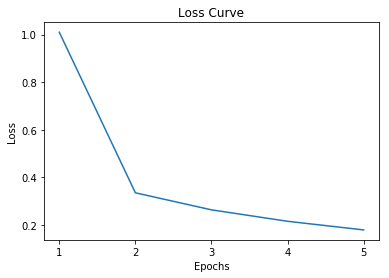

In [311]:
plt.xticks(epoch_graph)
plt.plot(epoch_graph, loss_graph) 

# naming the x axis 
plt.xlabel('Epochs') 
# naming the y axis 
plt.ylabel('Loss') 
  
# giving a title to my graph 
plt.title('Loss Curve') 

In [328]:
#Predicting Output
predict_loader = torch.utils.data.DataLoader(test_data,batch_size=50, shuffle=True)

batch_size_predict=50

predict_loader=list(predict_loader)


for i in range(len(predict_loader)):
    predict_loader[i][0]=predict_loader[i][0].view(batch_size_predict,-1)

a=randint(0,len(predict_loader))
prediction_v,pred=net.predict(predict_loader[a][0])
pred=pred.tolist()


[4,
 9,
 4,
 5,
 3,
 0,
 3,
 7,
 2,
 1,
 4,
 8,
 3,
 0,
 1,
 4,
 2,
 7,
 7,
 3,
 9,
 1,
 7,
 8,
 3,
 0,
 4,
 7,
 3,
 3,
 1,
 7,
 1,
 9,
 4,
 6,
 5,
 1,
 5,
 2,
 3,
 0,
 8,
 7,
 6,
 7,
 9,
 6,
 1,
 9]

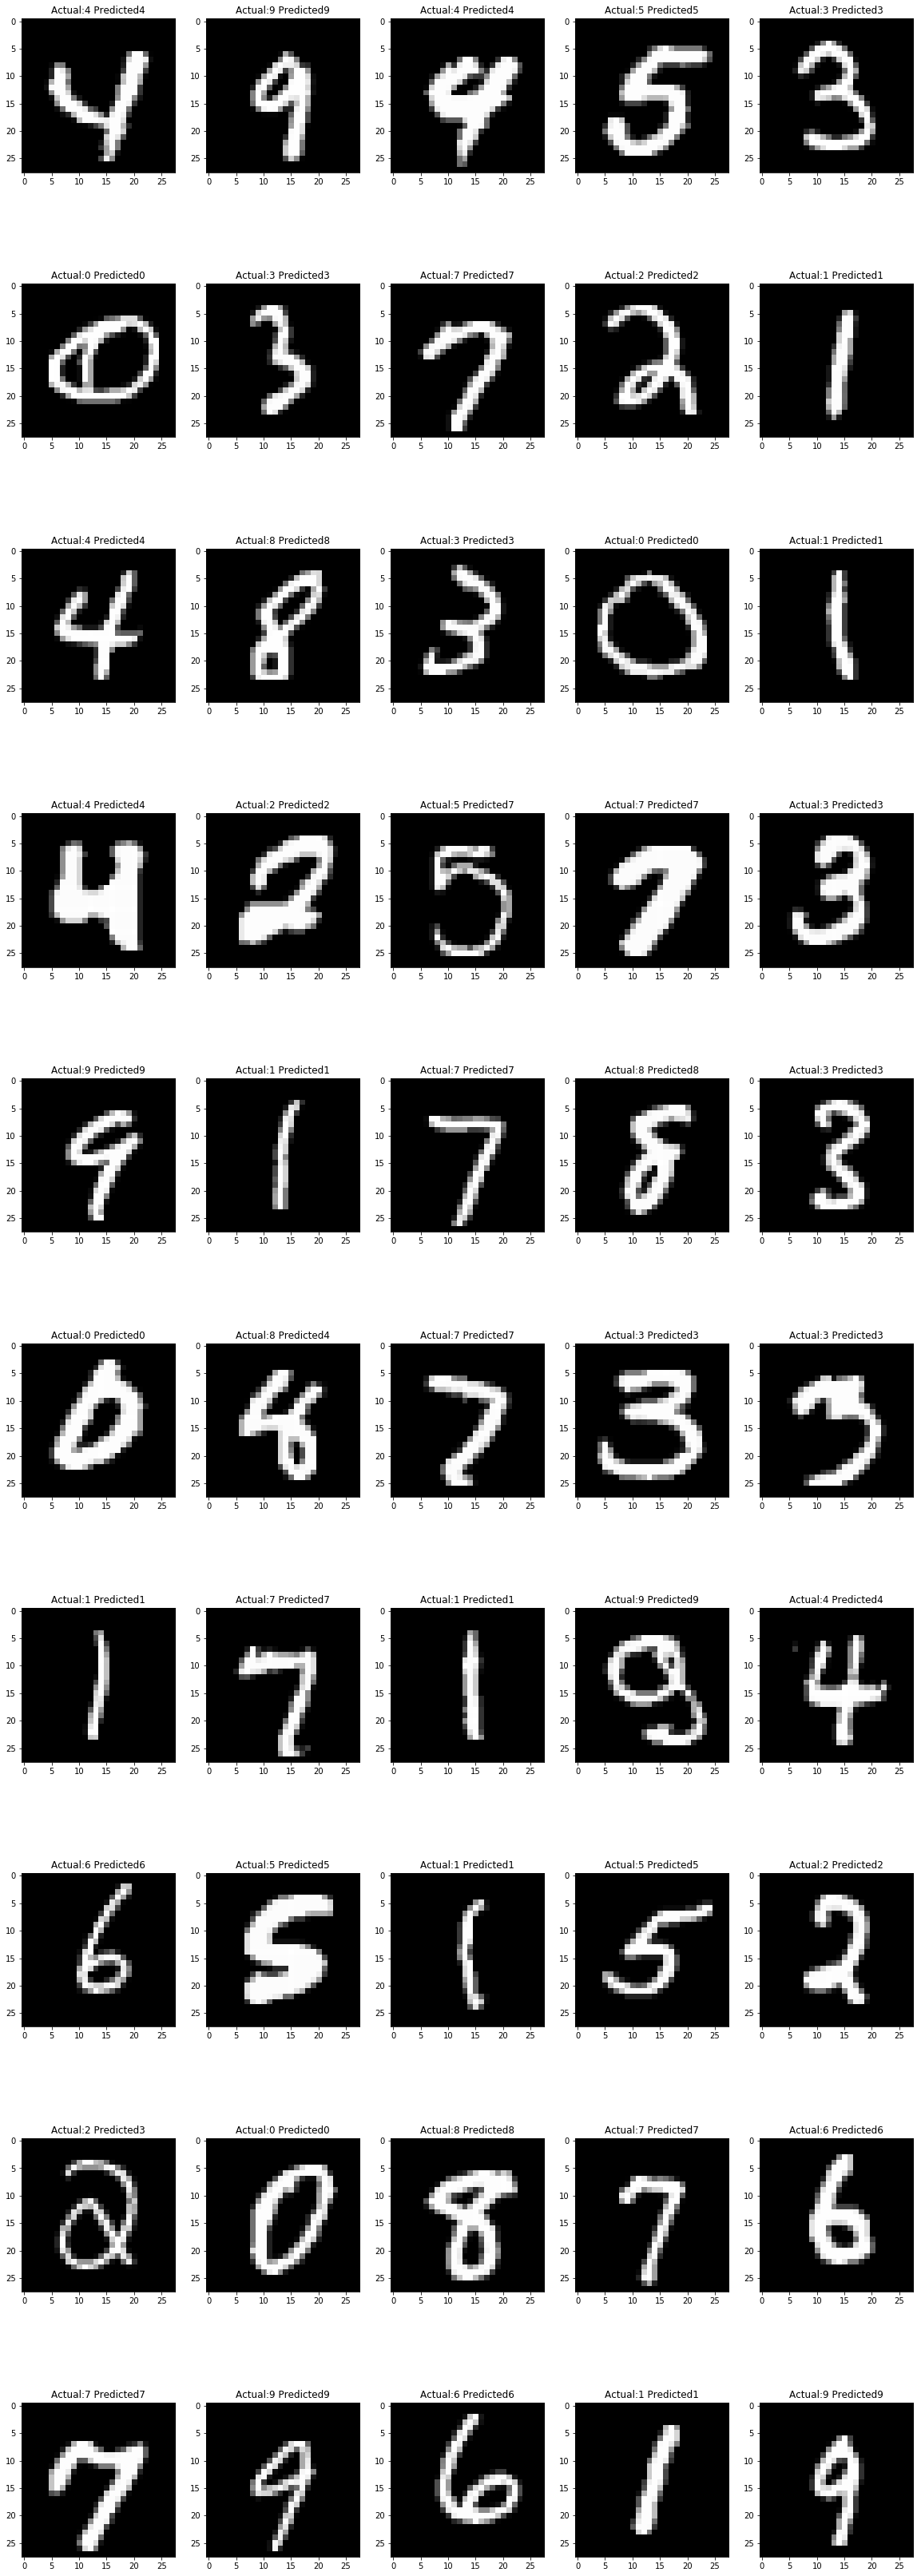

In [331]:
#Comparing Prediction

fig=plt.figure(figsize=(20, 60))

for i in range(len(predict_loader[a][0])):
    fig.add_subplot(10,5,i+1)
    plt.imshow(predict_loader[a][0][i].reshape(28,28),cmap='gray')
    ans='Actual:'+str(predict_loader[a][1][i].item())+' Predicted'+str(pred[i])
    plt.title(ans)